In [ ]:
import pandas as pd
import numpy as np





import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa import deterministic
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
res.index[:10]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [6]:
res.shape

(920628, 16)

In [15]:
from datetime import datetime
def data_string_conversion(date_time):
    datetim_=datetime.strftime(date_time,'%Y-%m-%d')
    return datetim_

In [1]:
#
res_1=pd.DataFrame([])

NameError: name 'pd' is not defined

In [18]:
labels=res_1.groupby(['Opened_']).value_counts().index
data=res_1.groupby(['Opened_']).value_counts().values

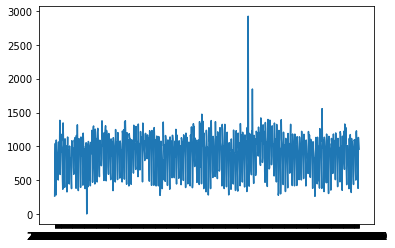

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(labels,data)

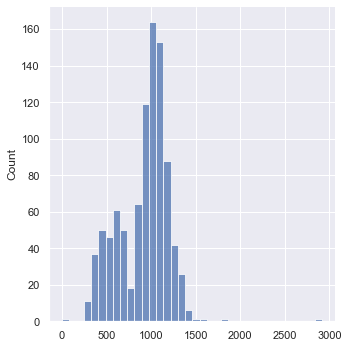

In [21]:
sns.set_theme(style="darkgrid")
sns.displot(data)

C:\Users\pnl0gp8t\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Opened_'>

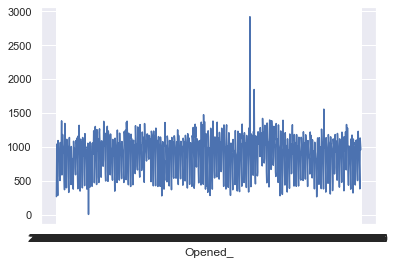

In [22]:
sns.lineplot(labels,data)

In [23]:
import statsmodels.api as sm

In [24]:
res_2= res_1.set_index('Opened_')

In [25]:
X=res_1['Opened_'].value_counts().index
y=res_1['Opened_'].value_counts().values


In [26]:
final_df=pd.DataFrame({'X':X,'Y':y})

In [27]:
final_df['X']=pd.to_datetime(final_df['X'])

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   X       940 non-null    datetime64[ns]
 1   Y       940 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.8 KB


In [29]:
final_df.set_index(X,inplace=True)

In [30]:
final_df.drop(['X'],axis=1)

,Y
2021-09-23,2922
2021-10-06,1847
2022-05-09,1557
2021-05-03,1475
2021-11-01,1420
...,...
2021-12-25,278
2020-12-25,276
2020-01-01,265
2022-04-17,262


In [31]:
# monthly_tik = pd.DataFrame()

# monthly_tik['Y'] = final_df['Y'].resample('m').mean()

In [32]:
# final_df['Y'].resample('MS').pad()

In [33]:
final_df.shape

(940, 2)

In [34]:
final_df.drop(['X'],axis=1,inplace=True)

In [35]:
# final_df['Y'].resample('MS').values.ffill()

<AxesSubplot:>

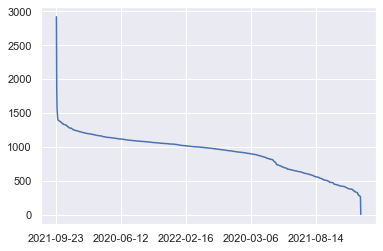

In [36]:
final_df['Y'].plot()

In [37]:
# final_df

In [38]:
final_df=pd.DataFrame({'X':X,'Y':y})
sorted_dt=final_df.sort_values(by=['X'])

Text(0.5, 1.0, 'Daily Trend')

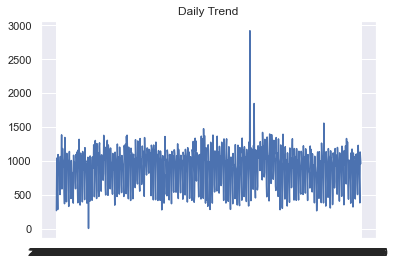

In [39]:
plt.plot(sorted_dt['X'],sorted_dt['Y'])
plt.title('Daily Trend')

In [40]:
# sns.lineplot(sorted_dt['X'],sorted_dt['Y'])

<AxesSubplot:xlabel='Y', ylabel='Count'>

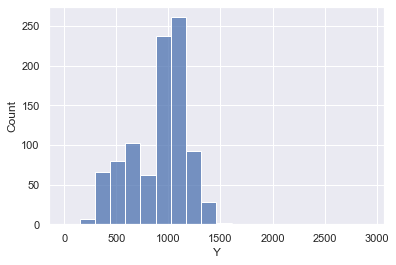

In [41]:
sns.histplot(sorted_dt['Y'],bins=20)

In [42]:
sorted_dt.set_index(pd.to_datetime(sorted_dt['X']),inplace=True)

In [43]:
sorted_dt.drop(['X'],axis=1,inplace=True)

In [44]:
sorted_dt.head(2)

,Y
X,
2020-01-01,265
2020-01-02,830


In [45]:
#monthly resample
sorted_df_month_=pd.DataFrame()
sorted_df_month_['Y']=sorted_dt[['Y']].resample('MS').mean()


C:\Users\pnl0gp8t\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly Trend')

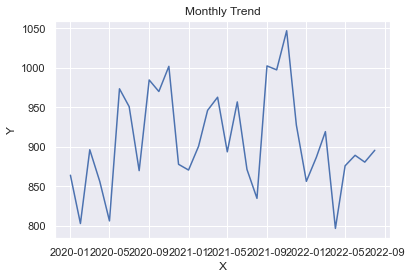

In [46]:
sns.lineplot(sorted_df_month_.index,sorted_df_month_.Y)
plt.title('Monthly Trend')

In [47]:
# sorted_df_month

Text(0.5, 1.0, 'area fills')

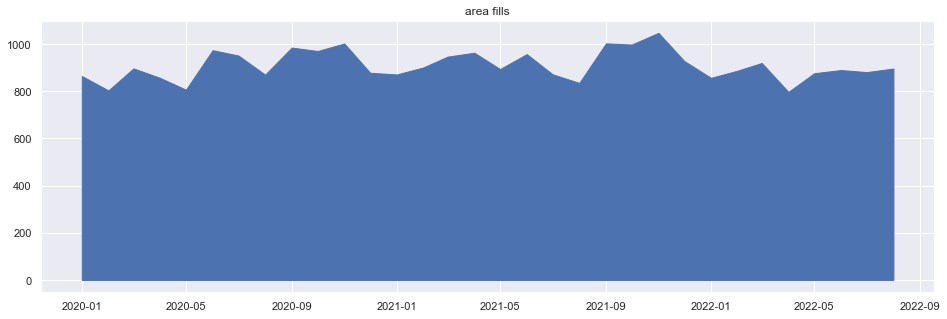

In [48]:
X=sorted_df_month_.index
y1=sorted_df_month_['Y'].values

fig,ax=plt.subplots(1,1,figsize=(16,5))
fig=plt.fill_between(x=X,y1=y1,y2=0,color='b')
plt.title('area fills')


In [49]:
sorted_df_month_['Year']=[d.year for d in sorted_df_month_.index]
sorted_df_month_['Month']=[d.strftime('%b') for d in sorted_df_month_.index]

In [50]:
years=sorted_df_month_['Year'].unique()
month=[d.strftime('%b') for d in sorted_df_month_.index]

Text(0.5, 1.0, 'Month-wise Box Plot\n(The Seasonality)')

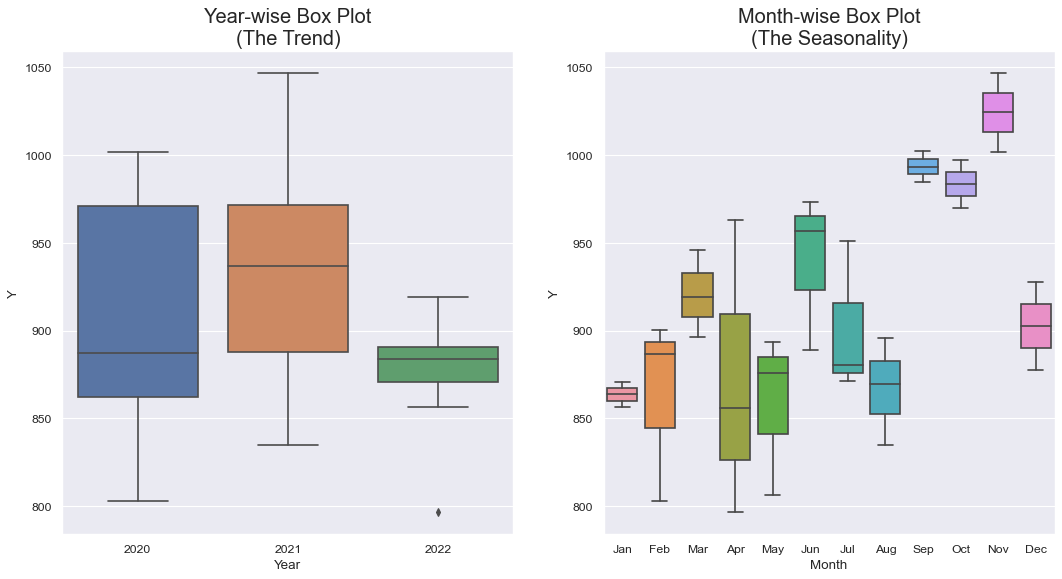

In [51]:
fig,ax=plt.subplots(1,2,figsize=(16,8),dpi=80)
sns.boxplot(x='Year',y='Y',data=sorted_df_month_,ax=ax[0])
sns.boxplot(x='Month',y='Y',data=sorted_df_month_,ax=ax[1])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

Text(0.5, 1.0, 'Seasonal decompose')

<Figure size 1152x576 with 0 Axes>

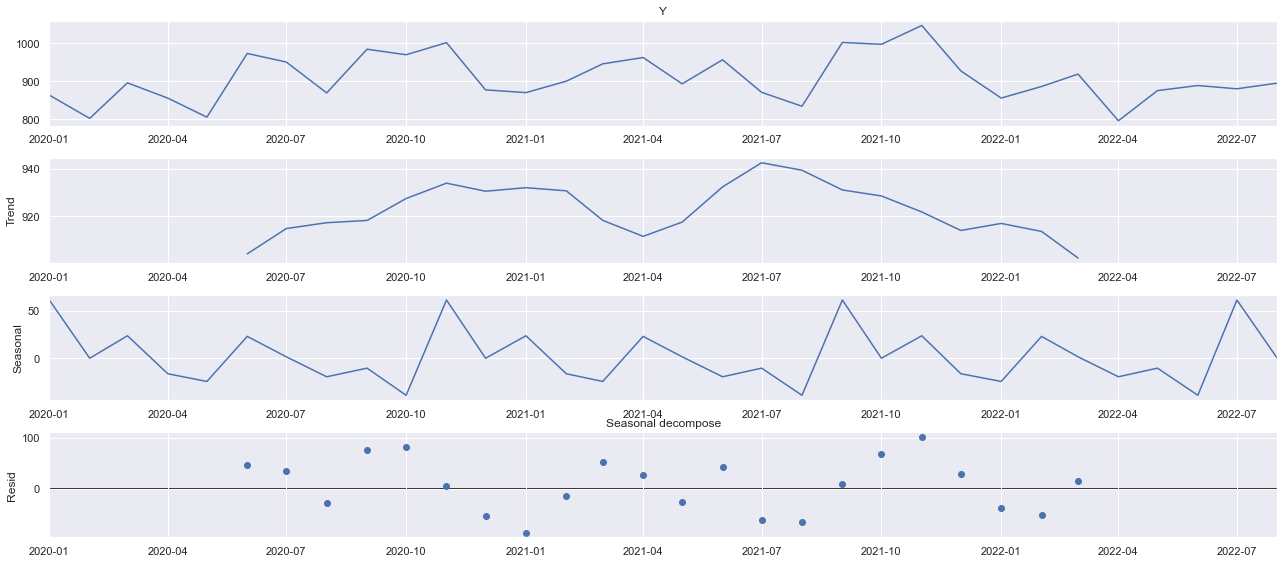

In [52]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decom=sm.tsa.seasonal_decompose(sorted_df_month_['Y'],model='additive',period=10)
plt.figure(figsize=(16,8))
fig=decom.plot()
plt.title('Seasonal decompose')

Text(0.5, 1.0, 'Seasonal decompose')

<Figure size 1152x576 with 0 Axes>

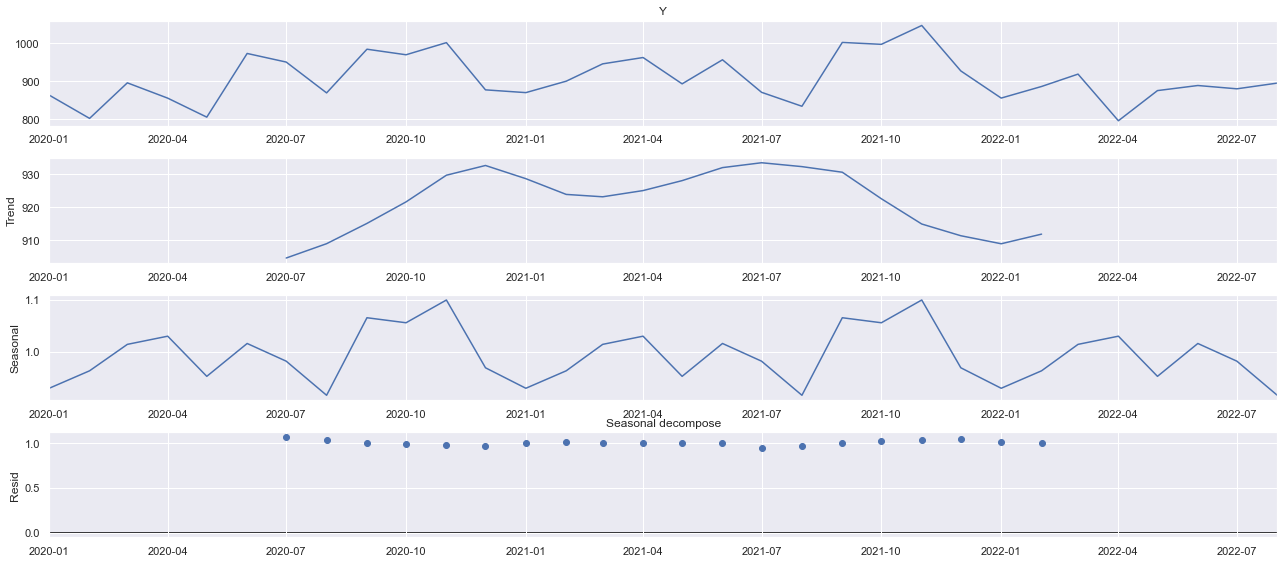

In [53]:
rcParams['figure.figsize'] = 18, 8
decom=sm.tsa.seasonal_decompose(sorted_df_month_['Y'],model='multiplicative')
plt.figure(figsize=(16,8))
fig=decom.plot()
plt.title('Seasonal decompose')

In [54]:
#stationary check
from statsmodels.tsa.stattools import adfuller


In [55]:
moving_avg=sorted_df_month_[['Y']].rolling(10).mean()
moving_std=sorted_df_month_[['Y']].rolling(10).std()

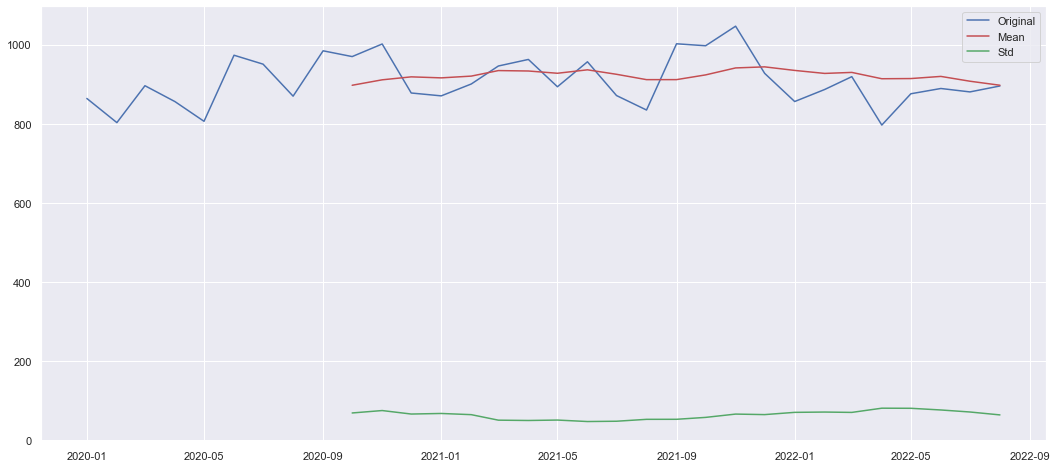

In [56]:
orig=plt.plot(sorted_df_month_[['Y']],color='b',label='Original')
mean=plt.plot(moving_avg[['Y']],color='r',label='Mean')
std=plt.plot(moving_std[['Y']],color='g',label='Std')
plt.legend(loc='best')

In [57]:
adfull=adfuller(sorted_df_month_[['Y']],autolag='AIC')

In [58]:
dfoutput = pd.Series(adfull[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [59]:
dfoutput

Test Statistic                 -4.087398
p-value                         0.001016
#Lags Used                      0.000000
Number of Observations Used    31.000000
dtype: float64

In [60]:
for key,value in adfull[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                 -4.087398
p-value                         0.001016
#Lags Used                      0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [61]:
adf_df=final_df.sort_values(by='X')

In [62]:
adf_df=adf_df.set_index('X')

<AxesSubplot:xlabel='X'>

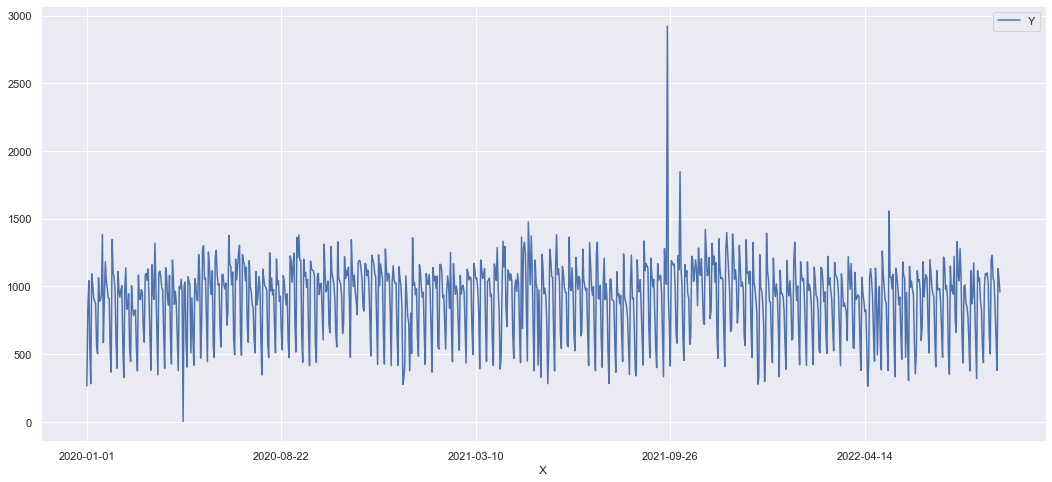

In [63]:
adf_df.plot()

In [64]:
adf_test=adfuller(adf_df[['Y']],autolag='AIC')

In [65]:
dfoutput1 = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput1

Test Statistic                  -4.195408
p-value                          0.000671
#Lags Used                      20.000000
Number of Observations Used    919.000000
dtype: float64

In [66]:
ma_log=np.log(adf_df[['Y']])
adf_df[['Y']]

,Y
X,
2020-01-01,265
2020-01-02,830
2020-01-03,1043
2020-01-04,551
2020-01-05,281
...,...
2022-08-27,621
2022-08-28,380
2022-08-29,1131


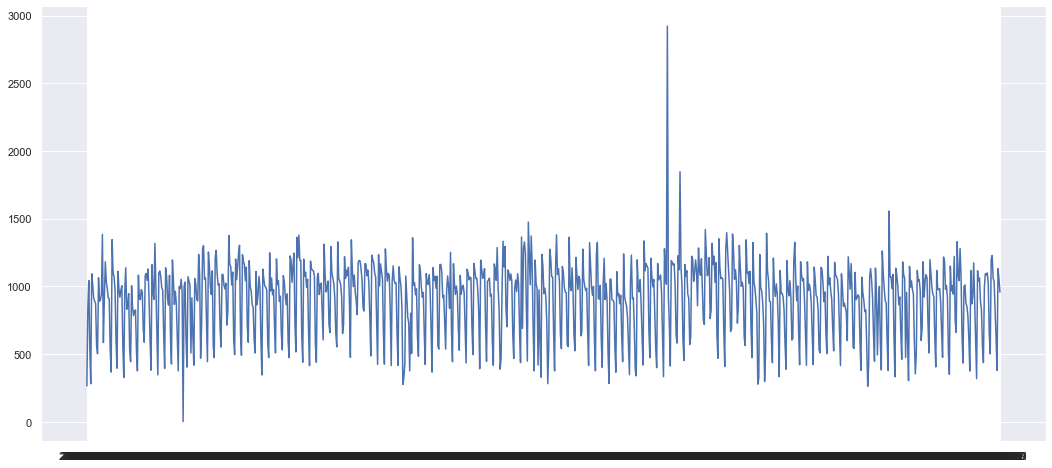

In [67]:
# plt.plot(ma_log,color='r')
plt.plot(adf_df[['Y']],color='b')

In [68]:
moving_avg=ma_log.rolling(12).mean()

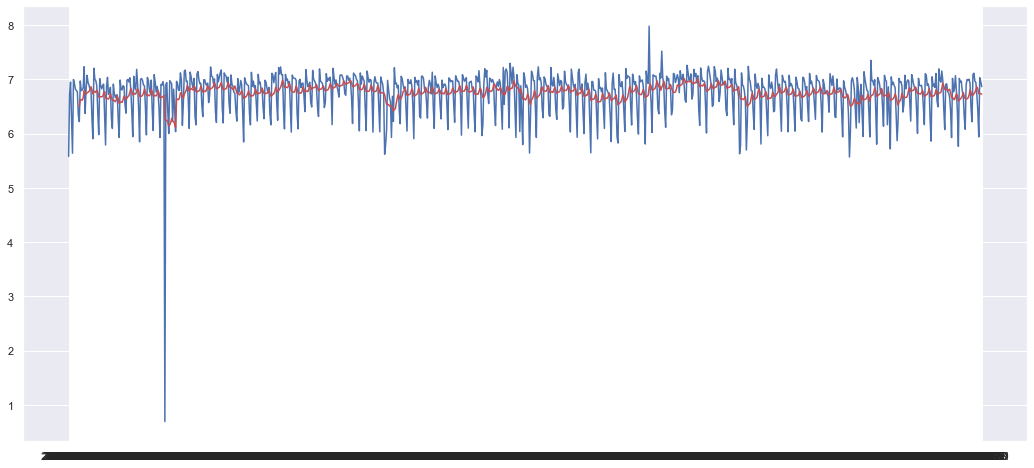

In [69]:
moving_avg
plt.plot(ma_log,color='b')
plt.plot(moving_avg,color='r')

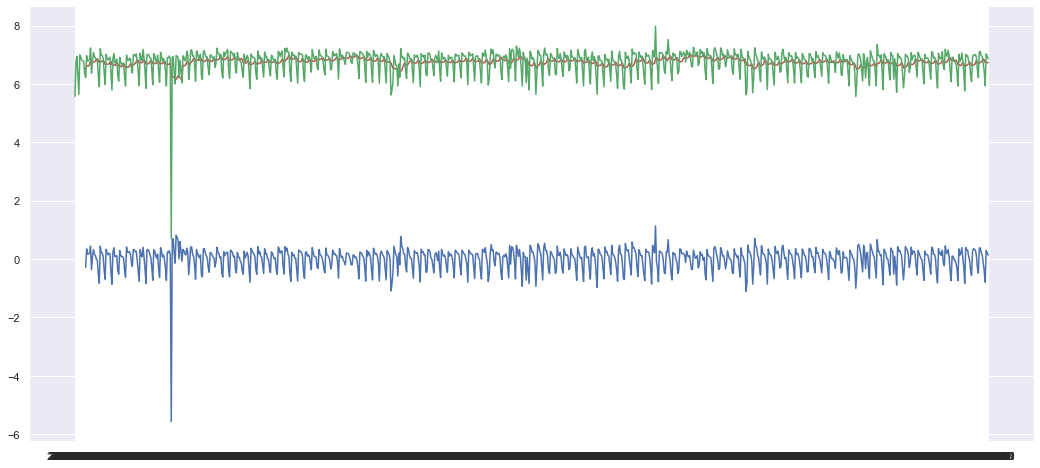

In [70]:
#difference avg
ts_log_ma_diff=ma_log-moving_avg
plt.plot(ts_log_ma_diff,color='b')
plt.plot(moving_avg,color='r')
plt.plot(ma_log,color='g')

In [71]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

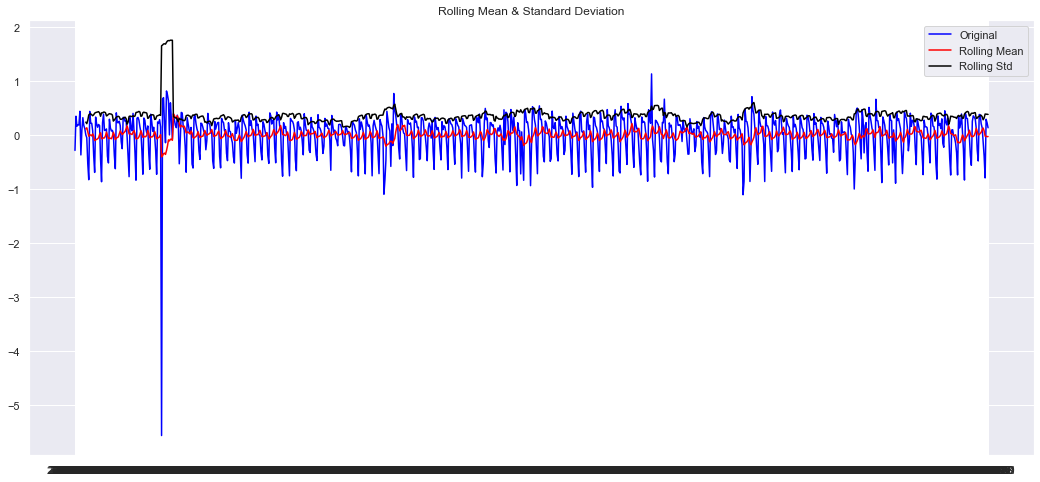

Results of Dickey-Fuller Test:
Test Statistic                -8.855598e+00
p-value                        1.531011e-14
#Lags Used                     2.100000e+01
Number of Observations Used    9.070000e+02
Critical Value (1%)           -3.437580e+00
Critical Value (5%)           -2.864732e+00
Critical Value (10%)          -2.568470e+00
dtype: float64


In [72]:
ts_log_ma_diff.dropna(inplace=True)
test_stationarity(ts_log_ma_diff)

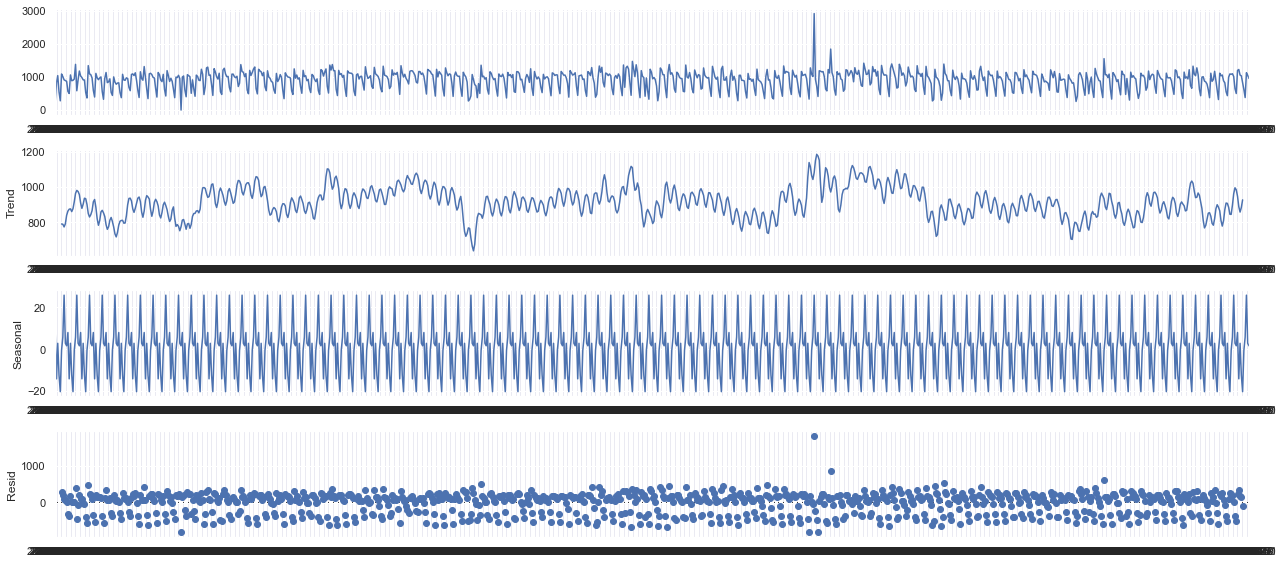

In [73]:
##Decomposing
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
# from statsmodels.tsa import seasonal_decompose
decomp=sm.tsa.seasonal_decompose(adf_df[['Y']],model='additive',period=10)
fig=decomp.plot()
plt.show()

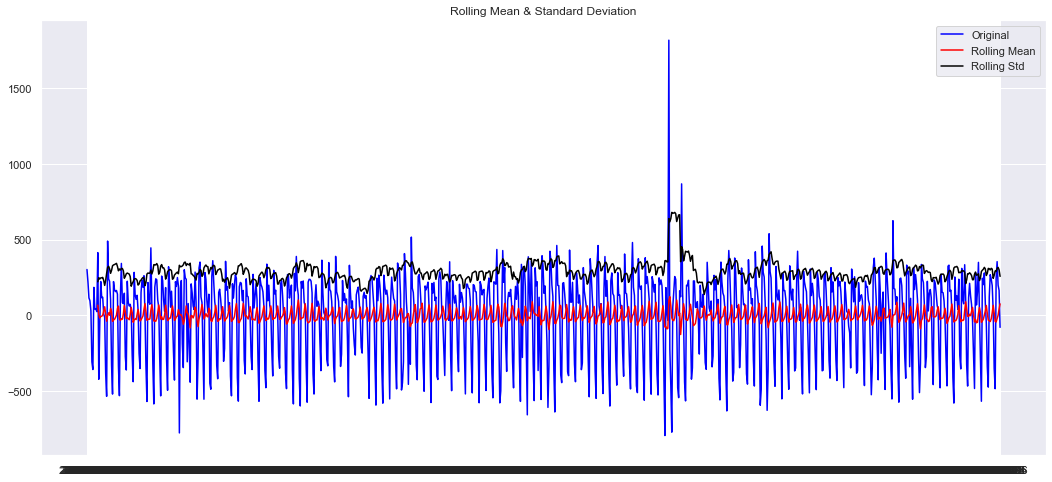

Results of Dickey-Fuller Test:
Test Statistic                -1.199138e+01
p-value                        3.514461e-22
#Lags Used                     2.100000e+01
Number of Observations Used    9.080000e+02
Critical Value (1%)           -3.437572e+00
Critical Value (5%)           -2.864728e+00
Critical Value (10%)          -2.568468e+00
dtype: float64


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_=seasonal_decompose(adf_df[['Y']],period=10)
resid=decomp.resid

resid.dropna(inplace=True)

test_stationarity(resid)

In [75]:
train=final_df[['Y']][:800]
test=final_df[['Y']][800:-2]

In [76]:
from pmdarima import auto_arima
auto_arima()

TypeError: auto_arima() missing 1 required positional argument: 'y'

In [ ]:
auto_arima(train,test='adf',seasonal=True,error_action='ignore',suppress_warnings=True,trace=True)

In [ ]:
auto_arima(train,test='kpss',seasonal=True,error_action='ignore',suppress_warnings=True,trace=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace import sarimax


In [ ]:
model=ARIMA(train,order=(1,1,1)).fit()
model.summary()

In [ ]:
pred= model.predict(start=len(train), end=(final_df.shape[0]-3),dynamic=True)
pred

In [ ]:
test

In [ ]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

In [ ]:
train=plt.plot(train,label='Train',color='b')
test=plt.plot(test,label='Test',color='g')
pred=plt.plot(pred,label='Pred',color='r')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
sarimax_model=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
sarimax_model.summary()

In [ ]:
preds_sariamx=sarimax_model.predict(start= len(train), end=(final_df.shape[0]-3),dynamic=True)

In [ ]:
train=plt.plot(train,label='Train',color='b')
test=plt.plot(test,label='Test',color='g')
preds_sariamx=plt.plot(preds_sariamx,label='Pred-sarimax',color='r')
pred=plt.plot(pred,label='Pred-ARIMA',color='r')
plt.legend()
plt.show()

In [ ]:
sarimax_mape=mean_absolute_percentsage_error(test,preds_sarimax)
print('MAPE1: %f' %sarimax_mape)

In [ ]:
future_sale= preds_sariamx.predict(start= len(train), end=(final_df.shape[0]-3),dynamic=True)
future_sale